# **Laboratório 02 - Resolução de Equações Não-lineares**

Aluno:

**Método da Bissecção**

* passo 01 - Entradas $(a, b, tol)$ de modo que $f(a).f(b) < 0.$
* passo 02 - Estimativa da raiz
$$
x_r = \frac{a + b}{2}
$$

**se** $\,\,f(a).f(x_r) < 0$
$$
b \leftarrow x_r
$$
volte ao passo 02

**else**
$$
a \leftarrow x_r
$$

**se** $\,\,E_r \leq tol$ $\rightarrow x_r$ é solução.


Exemplo 01 - Obter uma raiz do seguinte polinômio:

$$
p(x) = 2x^2 - 5x + 3
$$

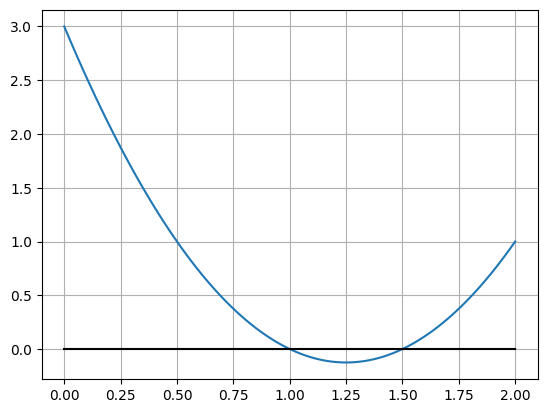

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0,2,100)
fx = 2*x**2 - 5*x + 3

fig, ax = plt.subplots()

ax.plot(x,fx)
ax.plot(x,0*x,'k')
ax.grid()
plt.show()


In [3]:
# Método da bissecção para determinação de raízes

# Definindo a função
def f(x):
    return 2*x**2 - 5*x + 3

# Implementando o método da bissecção
def met_bisseccao(a, b, tol):
    n = 1
    print('\n\n*** IMPLEMENTAÇÃO DO MÉTODO DA BISSECÇÃO ***')
    print('--------------------------------------------------------------------------')
    print('iter. \t\t a \t\t b \t\t xr \t\t f(xr)        ')
    print('--------------------------------------------------------------------------')
    condicao = True
    while condicao:
        xr = (a + b) / 2
        print('%d\t\t% 10.8f\t% 10.8f\t% 10.8f\t% 10.8f\t' %(n, a, b, xr, f(xr)))

        if f(a) * f(xr) < 0:
            b = xr
        else:
            a = xr

        n += 1
        condicao = abs(f(xr)) > tol

    print('\n A raiz encontrada é  : %0.8f' % xr)


# Dados de entrada
a = float(input('Valor de a : '))
b = float(input('Valor de b : '))
tol = float(input('Erro tolerável : '))

# Checando se há raiz no intervalo
if f(a) * f(b) > 0.0:
    print('Não há raiz no intervalo dado. Tente novos valores')
else:
    met_bisseccao(a, b, tol)

Valor de a : 0
Valor de b : 1.2
Erro tolerável : 0.0001


*** IMPLEMENTAÇÃO DO MÉTODO DA BISSECÇÃO ***
--------------------------------------------------------------------------
iter. 		 a 		 b 		 xr 		 f(xr)        
--------------------------------------------------------------------------
1		 0.00000000	 1.20000000	 0.60000000	 0.72000000	
2		 0.60000000	 1.20000000	 0.90000000	 0.12000000	
3		 0.90000000	 1.20000000	 1.05000000	-0.04500000	
4		 0.90000000	 1.05000000	 0.97500000	 0.02625000	
5		 0.97500000	 1.05000000	 1.01250000	-0.01218750	
6		 0.97500000	 1.01250000	 0.99375000	 0.00632813	
7		 0.99375000	 1.01250000	 1.00312500	-0.00310547	
8		 0.99375000	 1.00312500	 0.99843750	 0.00156738	
9		 0.99843750	 1.00312500	 1.00078125	-0.00078003	
10		 0.99843750	 1.00078125	 0.99960937	 0.00039093	
11		 0.99960937	 1.00078125	 1.00019531	-0.00019524	
12		 0.99960937	 1.00019531	 0.99990234	 0.00009768	

 A raiz encontrada é  : 0.99990234


**Método de Newton**

* passo 01 - Defina $tol$ e escolha $x_0$ de modo que

$$
 f(x_0).f^{\prime \prime}(x_0) > 0.
$$

* passo 02 - para $i = 0,1,2, \cdots , n.$

$$
x_{i+1} = x_i - \frac{f(x_i)}{f^{\prime}(x_i)}
$$

**se** $\,\,E_r \leq tol$ $\rightarrow x_{i+1}$ é solução.

**else**

volte ao passo 02.

Exercício 02 - Utilizando o método de Newton. Determine as raízes da função $f(x) = x + 3\,cos(x) - 2.$

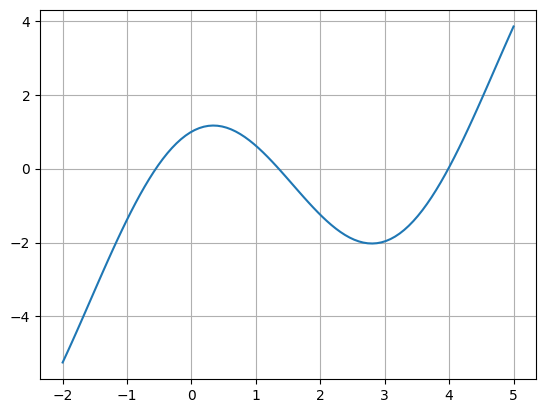

In [4]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-2,5,100)
fx = x + 3*np.cos(x) - 2

fig, ax = plt.subplots()

ax.plot(x,fx)
ax.grid()
plt.show()

In [5]:
import numpy as np

# Definindo a função
def f(x):
    return x + 3*np.cos(x) - 2

# Definindo a derivada da função
def df(x):
    return 1 - 3*np.sin(x)

# Implementando o método de Newton - Raphson

def met_NewtonRaphson(x0,tol,N):
    print('\n\n*** IMPLEMENTAÇÃO DO MÉTODO DE NEWTON RAPHSON ***')
    n = 1
    flag = 1
    condicao = True
    while condicao:
        if df(x0) == 0.0:
            print('Erro - Divisão por zero!')
            break

        xr = x0 - f(x0)/df(x0)
        print('Iteração %d, x1 = %0.6f and f(x1) = %0.6f' % (n, xr, f(xr)))
        x0 = xr
        n += 1

        if n > N:
            flag = 0
            break

        condicao = abs(f(xr)) > tol

    if flag==1:
        print('\n A Raiz desejada é : %0.8f' % xr)
    else:
        print('\n Não Convergente.')


# Dados de entrada
x0 = float(input('Condição Inicial : '))
tol = float(input('Erro Tolerável : '))
N = int(input('Número máximo de iterações : '))


# nicialiando o método de Newton - Raphson
met_NewtonRaphson(x0, tol, N)

Condição Inicial : 0
Erro Tolerável : 0.001
Número máximo de iterações : 100


*** IMPLEMENTAÇÃO DO MÉTODO DE NEWTON RAPHSON ***
Iteração 1, x1 = -1.000000 and f(x1) = -1.379093
Iteração 2, x1 = -0.608703 and f(x1) = -0.147531
Iteração 3, x1 = -0.554372 and f(x1) = -0.003677
Iteração 4, x1 = -0.552946 and f(x1) = -0.000003

 A Raiz desejada é : -0.55294583


**------------------------------------------------------------------ Exercícios ------------------------------------------------------------------**

**Exercício 01** - A frequência natural de uma certa viga uniforme possui uma relação com as raízes de $\alpha_i$ da equação

\begin{equation*}
f(\alpha) = cosh(\alpha)\,cos(\alpha) + 1 = 0,
\end{equation*}
onde
\begin{equation*}
\alpha_i^4 = (2\pi f_i)^2 \frac{mL^3}{EI}.
\end{equation*}

Sendo, $f_i$ a ${i\_}$ésima frequência natural, $m$ a massa da viga, $L$ o comprimento, $E$ o módulo da elasticidade e $I$ o momento de inércia da seção transversal. Determine as menores frequências de uma viga em aço de $0,9\,m$ de comprimento, com uma seção transversal de $25\,mm$ de largura e $2,5\,mm$ de altura. A densidade de massa do aço é de $7850\,\frac{kg}{m^3}$ e $E = 200GPa.$

**Exercício 02** - A velocidade ascendente de um foguete pode ser calculada pela seguinte equação:

\begin{equation*}
    v = u.ln\left ( \frac{m_0}{m_0 - q.t} \right )-g.t
\end{equation*}

onde $v$ representa a velocidade de subida, $u$ é a velocidade na qual o combustível é repelido com relação ao foguete, $m_0$ é a massa inicial ($t = 0s$), $q$ é a taxa de consumo de combustível, e $g$ a aceleração da gravidade para baixo $g \approx 9,81 \frac{m}{s^2}$. Se $u = 2000 \frac{m}{s}$, $m_0 = 150.000 kg$, e $q = 2700 \frac{kg}{s}$. Calcule o instante no qual a velocidade é igual a $750 \frac{m}{s}$ com $10 \leq t\leq 50s$. Considere uma tolerância de $10^{-20}$.

**Exercício 03** - Considerando um dado sistema massa-mola com deslocamento harmônico dado por $y(t) = A\,sen(\omega\,t)$ imposto, a resposta do deslocamento da massa é dado por $x(t) = B sen(\omega\,t - \theta),$ onde

\begin{equation*}
\frac{B}{A} = \sqrt{(1 + D cos(\phi))^2 + (D sen(\phi))^2}\,\,\,\,e\,\,\,\, tan(\theta) = \frac{D sen(\phi)}{1 + D cos(\phi)}.
\end{equation*}

Nas duas equações usamos as seguintes notações,

\begin{equation*}
D = \frac{\left ( \frac{\omega}{p} \right )^2}{\sqrt{\left [ 1 - \left ( \frac{\omega}{p} \right )^2 \right ]^2+ \left (  \frac{2\zeta \omega}{p}\right )^2 }}\,\,\,\,e\,\,\,\,tan(\phi) = \frac{\frac{2\zeta \omega}{p}}{1 - \left ( \frac{\omega}{p} \right )^2}
\end{equation*}

com $p = \sqrt{\frac{k}{m}}$ sendo a frequência natural do sistema e $\zeta = \frac{c}{2mp}$ o fator de amortecimento. Considerando, $m = 0,2\,kg$, $k = 2880\,\frac{N}{m},$ e $\omega = 96\,\frac{rad}{s}$. Determine o menor valor de $c$ (coeficiente de amortecimento) de modo que a relação $\frac{B}{A}$ seja menor ou igual a $1,5$.

**Exercício 04** - Escreva uma função $\it {raiz_{-}}$ ${\it {enesima(x, n, tol)}}$ para calcular $r = \sqrt[n]{x},$ por meio do método de Newton-Raphson.